In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset_path = 'titanic/titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col = "PassengerId"
    )

dataset = df.to_numpy().astype(np.float64)
X, y = dataset[:, :-1], dataset[:, -1]
print(X.shape)
print(y.shape)
print(X[:2,:])

(891, 8)
(891,)
[[ 3.      0.     22.      1.      0.      7.25    0.      0.    ]
 [ 1.      1.     38.      1.      0.     71.2833  1.      1.    ]]


## Add bias to dataset

In [20]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
print(X_b[:2,:])

[[ 1.      3.      0.     22.      1.      0.      7.25    0.      0.    ]
 [ 1.      1.      1.     38.      1.      0.     71.2833  1.      1.    ]]


In [21]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size= val_size,
    random_state= random_state,
    shuffle= is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(623, 9)
(179, 9)
(89, 9)


In [22]:
normalize = StandardScaler()
X_train[:, 1:] = normalize.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalize.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalize.fit_transform(X_test[:, 1:])


In [26]:
from utils import predict, compute_loss, compute_gradient, update_theta, compute_accuracy

lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])
print(theta.shape)

(9,)


In [24]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_accs = []
    train_batch_losses = []
    val_batch_accs = []
    val_batch_losses = []
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(X_i, theta)

        loss_i = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_accuracy = compute_accuracy(X_train, y_train, theta)

        train_batch_losses.append(loss_i)
        train_batch_accs.append(train_accuracy)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)


    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f'\nEpoch {epoch+1}:\tTraining loss:{train_batch_loss:.3f}\tValidation loss:{val_batch_loss:.3f}')




Epoch 1:	Training loss:0.703	Validation loss:0.626

Epoch 2:	Training loss:0.670	Validation loss:0.604

Epoch 3:	Training loss:0.640	Validation loss:0.585

Epoch 4:	Training loss:0.614	Validation loss:0.569

Epoch 5:	Training loss:0.592	Validation loss:0.555

Epoch 6:	Training loss:0.572	Validation loss:0.543

Epoch 7:	Training loss:0.554	Validation loss:0.533

Epoch 8:	Training loss:0.539	Validation loss:0.525

Epoch 9:	Training loss:0.526	Validation loss:0.518

Epoch 10:	Training loss:0.514	Validation loss:0.513

Epoch 11:	Training loss:0.504	Validation loss:0.508

Epoch 12:	Training loss:0.495	Validation loss:0.504

Epoch 13:	Training loss:0.487	Validation loss:0.502

Epoch 14:	Training loss:0.480	Validation loss:0.499

Epoch 15:	Training loss:0.474	Validation loss:0.497

Epoch 16:	Training loss:0.468	Validation loss:0.496

Epoch 17:	Training loss:0.463	Validation loss:0.495

Epoch 18:	Training loss:0.459	Validation loss:0.494

Epoch 19:	Training loss:0.455	Validation loss:0.493

E

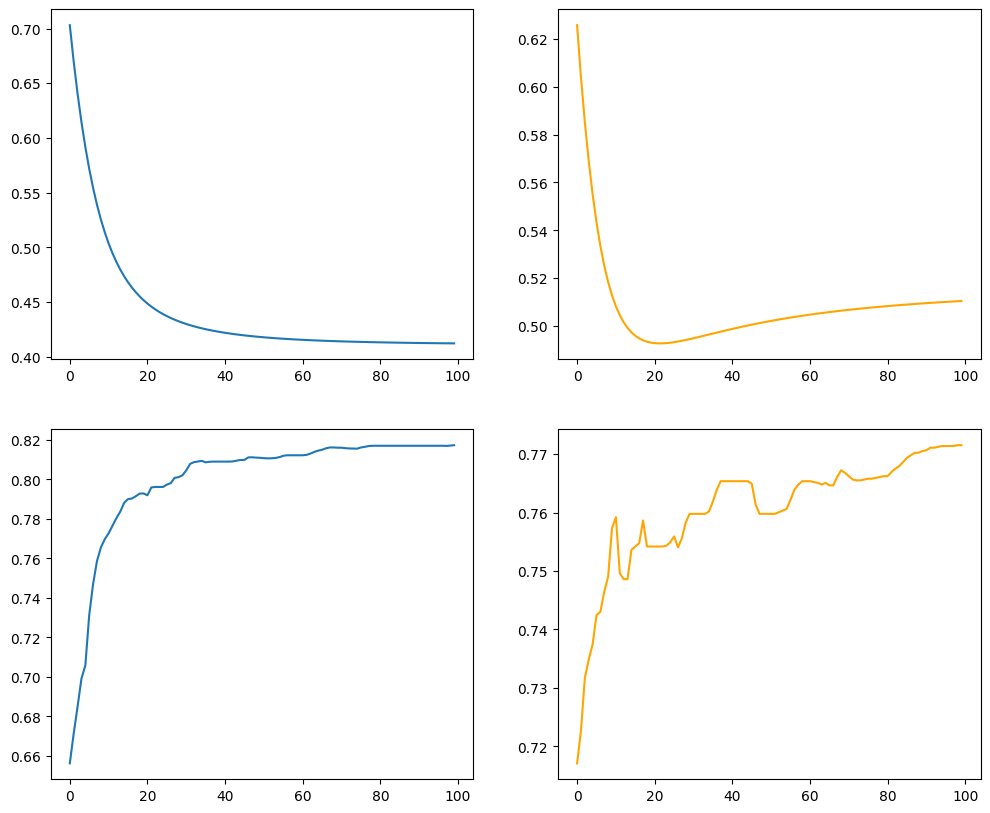

In [25]:
fig , ax = plt.subplots(2, 2, figsize=(12,10))

ax[0, 0].plot(train_losses)
ax[0, 1].plot(val_losses, 'orange')
ax[1, 0].plot(train_accs)
ax[1, 1].plot(val_accs, 'orange')


